In [116]:
import pandas as pd
import rdkit
from rdkit.Chem import MACCSkeys 
from rdkit.Chem import AllChem 
from rdkit import Chem

In [117]:
file=pd.read_csv("/Users/floralam/Downloads/drugs_smile.csv",sep="\t")
file

,drug_id,SMILES
0,1559,CCNC(=O)C1=C(C(=C2C=C(C(=CC2=O)O)C(C)C)ON1)C3=...
1,1058,CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...
2,1088,CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...
3,1549,CNC(=O)CN1CCC(CC1)OC2=C(C=C3C(=C2)C(=NC=N3)NC4...
4,1073,C1=C(C(=O)NC(=O)N1)F
...,...,...
164,1629,CC1=CN=C(N=C1NCC2=CC=C(C=C2)N3C=CN=N3)C4=CC=CC...
165,1799,C=CC(=O)N1CCCC(C1)N2C3=NC=NC(=C3C(=N2)C4=CC=C(...
166,1835,CC(=CC(=O)OC1CC2=CC(CC3(C(O3)C4C1C(=C)C(=O)O4)...
167,1908,CC(C)NC1=NC=C(C(=C1)C2=CNC(=C2)C(=O)NC(CO)C3=C...


In [118]:
mol = file.SMILES.apply(Chem.MolFromSmiles)

# Data preprocessing 

### Topological Fingerprints

Using rdkit package to convert the smiles into topological fingerprints

In [119]:
topo_fp= mol.apply(Chem.RDKFingerprint)
topotopo=topo_fp.apply(lambda x: x.ToBitString())
file['topo']=topotopo.apply(lambda x:" ".join(x)) 
#It wasn't exactly necessary to add space, I wanted to be able to split the string below 
#(at the preprocessing of input data section)
file['topo'][0]

'0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1

### Morgan Fingerprint

Using rdkit package to convert the smiles into ecfp/morgan fingerprints

In [120]:
morgan=mol.apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=1024))
morganmorgan= morgan.apply(lambda x: x.ToBitString())
file["circular"]=morganmorgan.apply(lambda x: " ".join(x))
file

,drug_id,SMILES,topo,circular
0,1559,CCNC(=O)C1=C(C(=C2C=C(C(=CC2=O)O)C(C)C)ON1)C3=...,0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 ...,0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,1058,CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...,1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 ...
2,1088,CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...,1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 ...,0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
3,1549,CNC(=O)CN1CCC(CC1)OC2=C(C=C3C(=C2)C(=NC=N3)NC4...,1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 ...
4,1073,C1=C(C(=O)NC(=O)N1)F,1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
...,...,...,...,...
164,1629,CC1=CN=C(N=C1NCC2=CC=C(C=C2)N3C=CN=N3)C4=CC=CC...,1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 ...,0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
165,1799,C=CC(=O)N1CCCC(C1)N2C3=NC=NC(=C3C(=N2)C4=CC=C(...,1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 ...,0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
166,1835,CC(=CC(=O)OC1CC2=CC(CC3(C(O3)C4C1C(=C)C(=O)O4)...,1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 ...
167,1908,CC(C)NC1=NC=C(C(=C1)C2=CNC(=C2)C(=O)NC(CO)C3=C...,1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 ...,0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 ...


In [121]:
#changing drug_id to ascending order
file.sort_values(["drug_id"], axis=0,\
                 ascending=True, inplace=True)

In [122]:
#to check the condition of the fule
file

,drug_id,SMILES,topo,circular
154,1003,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
70,1004,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 ...
68,1005,N.N.[Cl-].[Cl-].[Pt+2],0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
71,1006,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
61,1007,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 ...,0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 ...
...,...,...,...,...
113,2110,C1CC(C1)NC2=NC=CC(=C2)C(=O)NCC(CN3CCC4=CC=CC=C...,1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 ...,0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
114,2111,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...,1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
87,2169,CC1=CN2C(=O)C=C(N=C2C(=C1)C(C)NC3=CC=CC=C3C(=O...,1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 ...,0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
107,2171,CC1(CCCN1C2=NN3C=CC=C3C(=N2)NC4=NNC(=C4)C5CC5)...,1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 ...,0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


### MACCS 

Using rdkit package to convert the smiles into maccs fingerprints

In [123]:
maccs= mol.apply(MACCSkeys.GenMACCSKeys)
maccsmaccs=maccs.apply(lambda x: x.ToBitString())
file["maccs"]=maccsmaccs.apply(lambda x: " ".join(x))

In [124]:
file.to_csv("rdkit_fp_copy.csv", index=False)

### Merging of files to get ic50

Since the files for drug id and smiles, and the ic50 values are separated, they needed to be merged together for future use (in the regression models)

In [125]:
fpfile= pd.read_csv("/Users/floralam/rdkit_fp_copy.csv")
drugic= pd.read_csv("/Users/floralam/Downloads/DrugData.csv").drop(['TCGA_DESC'], axis=1)
drugic.columns=['cosmic_id','cell_line','drug_id','ic50','z_score']
drugic.head()

,cosmic_id,cell_line,drug_id,ic50,z_score
0,910927,CAL-51,1003,-3.521093,-0.686816
1,749712,HCC1395,1003,-2.309078,-0.096212
2,908122,MDA-MB-453,1003,-2.014633,0.047269
3,910852,CAL-85-1,1003,-1.177570,0.455162
4,906844,DU-4475,1003,-4.271105,-1.052290


In [126]:
newfile= pd.merge(drugic,fpfile)
newfile

,cosmic_id,cell_line,drug_id,ic50,z_score,SMILES,topo,circular,maccs
0,910927,CAL-51,1003,-3.521093,-0.686816,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,749712,HCC1395,1003,-2.309078,-0.096212,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
2,908122,MDA-MB-453,1003,-2.014633,0.047269,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
3,910852,CAL-85-1,1003,-1.177570,0.455162,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
4,906844,DU-4475,1003,-4.271105,-1.052290,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
...,...,...,...,...,...,...,...,...,...
7426,905951,BT-549,2172,3.098801,0.133899,CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...,1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 ...
7427,906862,EVSA-T,2172,-1.061746,-2.259969,CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...,1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 ...
7428,907046,HCC1569,2172,2.003400,-0.496365,CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...,1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 ...
7429,749709,HCC1954,2172,5.263321,1.379307,CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...,1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 ...


In [127]:
newfile= newfile.drop(['cosmic_id', 'z_score'],axis=1)

In [128]:
##picking particular cell line, CAL-51
#needed to isolate a cell line, otherwise the same drug will have different ic50 values due to the different cell lines
data= newfile[newfile['cell_line'].str.contains('CAL-51',na=False)]
data

,cell_line,drug_id,ic50,SMILES,topo,circular,maccs
0,CAL-51,1003,-3.521093,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
49,CAL-51,1004,-5.008028,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
93,CAL-51,1005,2.492692,N.N.[Cl-].[Cl-].[Pt+2],0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
143,CAL-51,1006,-1.082517,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
187,CAL-51,1007,-4.886498,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 ...,0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ...
...,...,...,...,...,...,...,...
7205,CAL-51,2109,1.913550,CC1CN(CC(N1)C)C2=NC=C(C(=C2)C)C3=CC=C(C=C3)C4=...,1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
7249,CAL-51,2110,3.605307,C1CC(C1)NC2=NC=CC(=C2)C(=O)NCC(CN3CCC4=CC=CC=C...,1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 ...,0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ...
7293,CAL-51,2111,2.103111,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...,1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
7337,CAL-51,2169,5.497304,CC1=CN2C(=O)C=C(N=C2C(=C1)C(C)NC3=CC=CC=C3C(=O...,1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 ...,0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


In [129]:
#removing unnecessary cell line column
data.drop(['cell_line'], axis=1)

,drug_id,ic50,SMILES,topo,circular,maccs
0,1003,-3.521093,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
49,1004,-5.008028,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
93,1005,2.492692,N.N.[Cl-].[Cl-].[Pt+2],0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
143,1006,-1.082517,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
187,1007,-4.886498,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 ...,0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ...
...,...,...,...,...,...,...
7205,2109,1.913550,CC1CN(CC(N1)C)C2=NC=C(C(=C2)C)C3=CC=C(C=C3)C4=...,1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
7249,2110,3.605307,C1CC(C1)NC2=NC=CC(=C2)C(=O)NCC(CN3CCC4=CC=CC=C...,1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 ...,0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ...
7293,2111,2.103111,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...,1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
7337,2169,5.497304,CC1=CN2C(=O)C=C(N=C2C(=C1)C(C)NC3=CC=CC=C3C(=O...,1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 ...,0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


# Training models (Topological Fingerprint)

In [130]:
#importing necessary libraries
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [131]:
#data.to_csv("cyinputdata_copy.csv", index=False)
data= pd.read_csv("/Users/floralam/cyinputdata_copy.csv").drop(['cell_line'], axis=1)

### Pre-processing of input data

In [132]:
import numpy as np

In [133]:
topo=data['topo']
topo_x= topo.apply(lambda x: np.fromstring(x,dtype=int, sep=' '))
X=topo_x
y=data['ic50']

In [134]:
X=pd.DataFrame(columns=[np.arange(1,2049)])
#
for i in range(0,len(topo_x)):
    X = X.append( pd.Series(topo_x[i], index=X.columns ),ignore_index=True)
X

,1,2,3,4,5,6,7,8,9,10,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,1,1,1,0,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,1,1,0,1,1,...,1,1,0,1,1,1,0,1,1,1
4,1,1,1,1,0,1,1,0,1,1,...,1,0,1,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,1,1,1,1,0,1,1,1,0,1,...,1,0,0,1,1,1,0,1,0,1
162,1,1,1,0,1,1,0,1,1,0,...,1,0,0,1,0,0,0,0,1,1
163,1,1,0,1,0,1,0,0,0,0,...,1,1,0,1,0,1,1,0,0,1
164,1,1,0,1,1,1,0,0,0,1,...,1,0,1,1,1,0,1,1,0,1


In [135]:
y

0     -3.521093
1     -5.008028
2      2.492692
3     -1.082517
4     -4.886498
         ...   
161    1.913550
162    3.605307
163    2.103111
164    5.497304
165    3.708490
Name: ic50, Length: 166, dtype: float64

### Linear Regression Model

In [136]:
#creating test and training set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
model= LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("The model score for linear regression model is",model.score(X_test,y_test))
#determining the accuracy
linreg_error=abs(y_pred-y_test)
linreg_mape=100*(linreg_error/y_test)
print("The accuracy score for linear regression model is",100-np.mean(linreg_mape))

The model score for linear regression model is -2.7373377563570074e+25
The accuracy score for linear regression model is -431325256781176.4


### Random Forest 

In [137]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
rfmodel= RandomForestRegressor(n_estimators=100)
rfmodel.fit(X_train,y_train)

#without feature selection
#score gives you correlation
rf_predict=rfmodel.predict(X_test)

print("The correlation score for training set is:",rfmodel.score(X_train,y_train))
print("The correlation score for test set is:",rfmodel.score(X_test,y_test))

#determining the accuracy
errors=abs(rf_predict-y_test)
mape=100*(errors/y_test)
print("The accuracy score for random forest model is",100-np.mean(mape))

The correlation score for training set is: 0.887216499074462
The correlation score for test set is: 0.2605417993987684
The accuracy score for random forest model is 76.48187653571068


### Support Vector Regression

In [138]:
#importing necessary files
from sklearn.svm import SVR

#creating test and training set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
svrmodel= SVR(C=1.0, epsilon=0.2)
svrmodel.fit(X_train,y_train)

svr_predict=svrmodel.predict(X_test)

#Accordint to the documentation, the score returns the coefficient of determination R^2 of the prediction
print("The R^2 value for training set is:",svrmodel.score(X_train,y_train))
print("The R^2 value for test set is:",svrmodel.score(X_test,y_test))

#determining the accuracy
svrerrors=abs(svr_predict-y_test)
svrmape=100*(svrerrors/y_test)
print("The accuracy score for svr model is",100-np.mean(svrmape))

The R^2 value for training set is: 0.47684616468069385
The R^2 value for test set is: 0.10097947060545376
The accuracy score for svr model is 94.5880273508109


__Summary of data__
<br>
The accuracy scores for the various models are as follows:<br>
Linear regression: -21555539930583.164 <br>
Random forest: 76.47653918094059 <br>
SVR: 94.5880273508109 <br>

## Feature selection (Using Lasso Regression)

In [139]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_scale= scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)
lasso = Lasso(alpha=.3)
lasso.fit(X, y)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [140]:
lasso.coef_.sum()

-2.9223085513503055

In [141]:
#by doing the step below,it allows the sum of all the feature importance to be 1
lasso_recoef= lasso.coef_/lasso.coef_.sum()

In [142]:
feature_importance= pd.DataFrame(lasso_recoef,\
                                 index = X.columns,\
                                 columns=['importance']).sort_values('importance', ascending=False)
feature_importance.round(6)

,importance
302,0.185871
437,0.172565
205,0.127155
217,0.093370
1982,0.088324
...,...
683,0.000000
682,0.000000
681,-0.000000
680,0.000000


Text(0, 0.5, 'Number of Features')

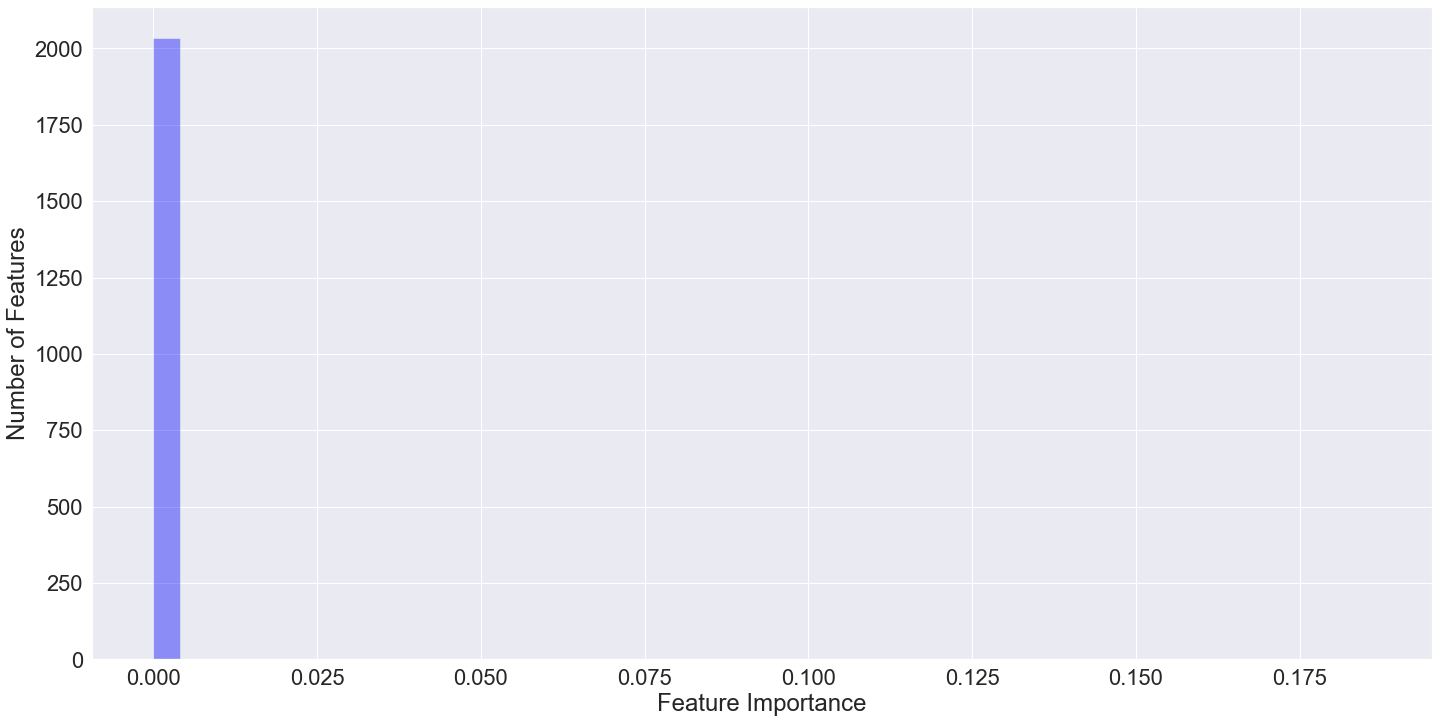

In [143]:
#identifying the relative importance of features within a fingerprint
import seaborn as sb
#histogram without feature selection
sb.set(font_scale=2)
f, axes = plt.subplots(1, 1, figsize=(24, 12))
a= sb.distplot(feature_importance, kde = False, color = "blue", axlabel="Feature Importance")
a.set_ylabel("Number of Features")

In [144]:
#select these indexes and get those respective features from X
feature_lasso=feature_importance[0:100]
feature_lasso

,importance
302,0.185871
437,0.172565
205,0.127155
217,0.093370
1982,0.088324
...,...
1293,0.000000
1292,0.000000
1291,0.000000
1290,0.000000


In [145]:
print(X[feature_lasso.index])

    302  437  205  217  1982 1383 1509 1392 576  1703  ... 1298 1297 1296  \
0      1    1    1    1    1    1    1    1    1    1  ...    1    1    1   
1      1    1    1    1    1    1    1    1    1    1  ...    1    1    1   
2      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3      0    0    1    1    1    0    1    1    1    1  ...    0    0    0   
4      1    1    1    1    1    1    1    1    1    1  ...    1    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
161    1    1    1    1    0    0    0    0    0    1  ...    0    0    0   
162    0    1    1    1    0    0    1    0    0    0  ...    1    1    0   
163    0    0    0    0    0    0    0    0    1    1  ...    0    0    1   
164    0    0    0    0    0    0    1    0    0    0  ...    0    1    1   
165    0    0    1    0    0    1    1    1    0    1  ...    1    1    0   

    1295 1294 1293 1292 1291 1290 1289  
0      1    1    1    1    1    0 

Text(0, 0.5, 'Number of Features')

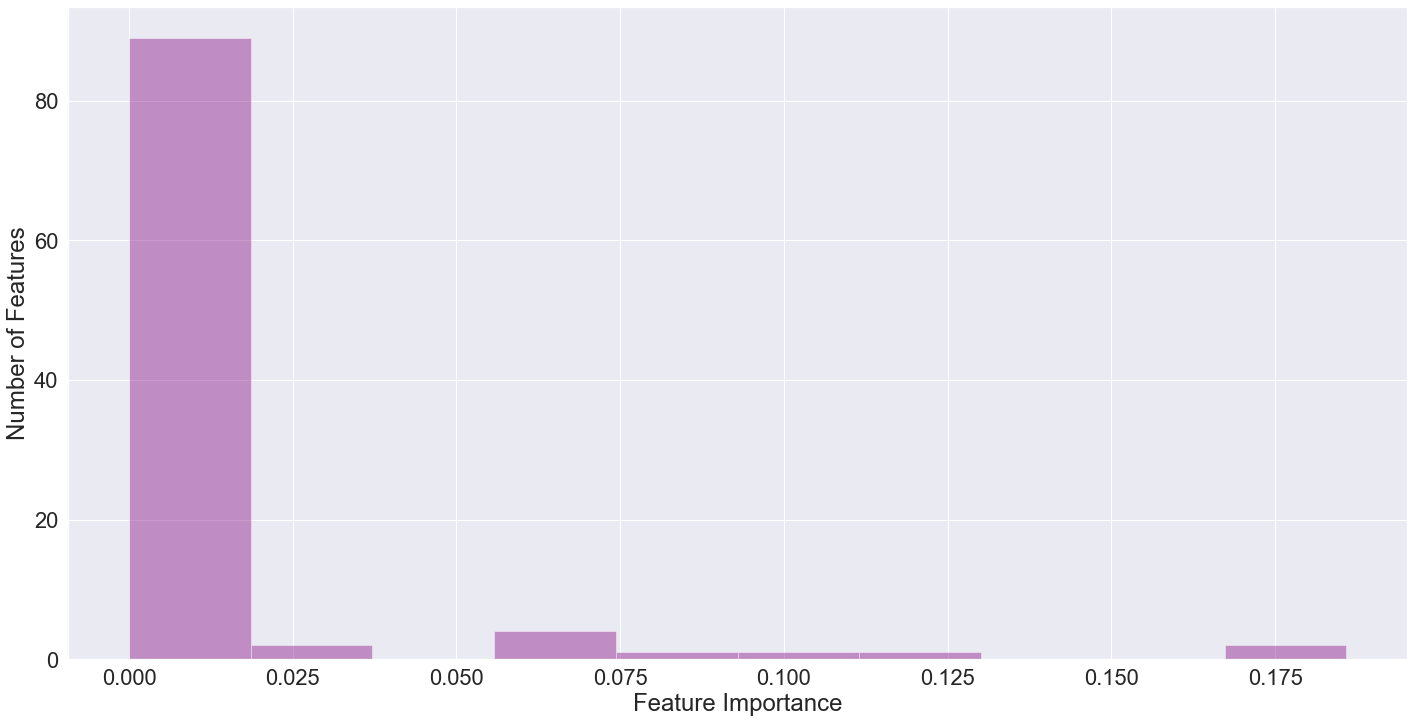

In [146]:
#plotting histogram for features after feature selection
import seaborn as sb

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(feature_lasso, kde = False, color = "purple",axlabel="Feature Importance")
axes.set_ylabel("Number of Features")

In [147]:
#creating test and training set after feature selection
X_lasso_train,X_lasso_test,y_lasso_train,y_lasso_test=train_test_split(X[feature_lasso.index],y,test_size=0.3,random_state=0)
lassomodel= LinearRegression()
lassomodel.fit(X_lasso_train,y_lasso_train)
y_lassopred=lassomodel.predict(X_lasso_test)

#new model score after feature selection
print("The model score for linear regression model is",lassomodel.score(X_lasso_test,y_lasso_test))

#determining the accuracy score
lassolinreg_error=abs(y_lassopred-y_lasso_test)
lassolinreg_mape=100*(lassolinreg_error/y_lasso_test)
print("The accuracy score for linear lasso regression model is:",100-np.mean(lassolinreg_mape))

The model score for linear regression model is -7.263067245547605
The accuracy score for linear lasso regression model is: -95.60106609129517


## Feature selection (Using SVM RFE)

In [148]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
svrmodel= SVR(kernel="linear") #read online that rfe only works when kernel is linear, not sure what is the effect
rfe= RFE(svrmodel,n_features_to_select=100, step=1)
rfe= rfe.fit(X,y)

In [149]:
rfe.ranking_

array([1476,  524,    1, ..., 1120,  101, 1937])

In [150]:
rfe.ranking_.sum()

1900374

Because the sum of feature importance is not 1, a new variable was created so that the feature importance would be relative, and the sum is 1

In [151]:
rfe_rerank=rfe.ranking_/rfe.ranking_.sum()

In [152]:
feature_importance= pd.DataFrame(rfe_rerank,\
                                   index = X.columns,\
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importance.round(6)

,importance
1689,0.001026
1426,0.001025
848,0.001025
474,0.001024
702,0.001023
...,...
911,0.000001
910,0.000001
1503,0.000001
399,0.000001


In [153]:
feature_importance.sum()

importance    1.0
dtype: float64

Text(0, 0.5, 'Number of Features')

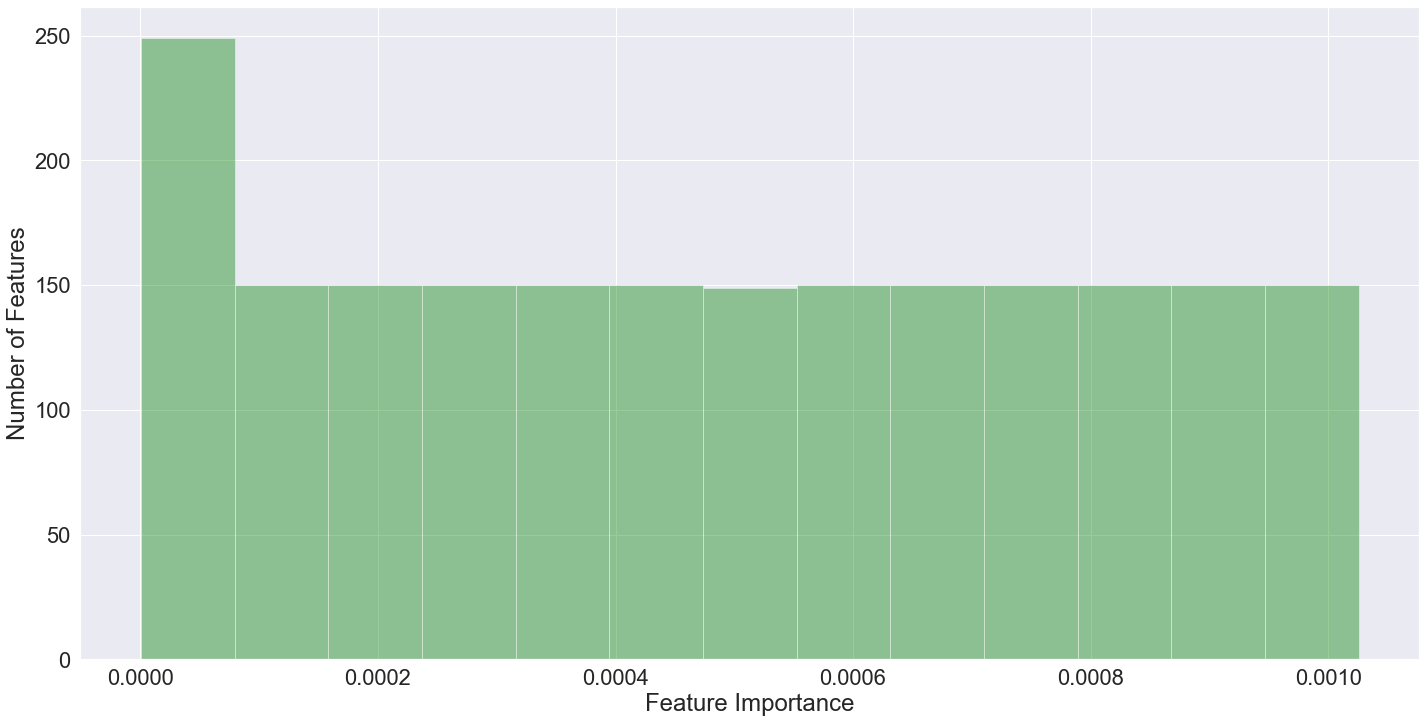

In [154]:
#identifying the relative importance of features within a fingerprint
import seaborn as sb
#histogram without feature selection
sb.set(font_scale=2)
f, axes = plt.subplots(1, 1, figsize=(24, 12))
a= sb.distplot(feature_importance, kde = False, color = "green", axlabel="Feature Importance")
a.set_ylabel("Number of Features")

In [155]:
#select these indexes and get those respective features from X
feature_sel=feature_importance[0:100]
feature_sel

,importance
1689,0.001026
1426,0.001025
848,0.001025
474,0.001024
702,0.001023
...,...
1346,0.000976
1220,0.000975
685,0.000975
742,0.000974


In [156]:
print(X[feature_sel.index])

    1689 1426 848  474  702  1049 1107 389  1313 1097  ... 1261 1604 843   \
0      1    1    1    1    1    0    1    1    1    1  ...    1    1    1   
1      0    1    1    1    1    1    1    1    1    1  ...    1    1    1   
2      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3      1    1    0    0    1    0    1    0    1    1  ...    1    1    1   
4      1    0    0    1    1    0    0    0    0    1  ...    1    1    1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
161    1    0    1    1    1    0    1    1    1    0  ...    1    0    1   
162    0    0    1    1    0    1    0    0    0    0  ...    0    1    1   
163    0    0    1    0    0    0    0    0    1    0  ...    0    1    1   
164    0    0    0    1    0    1    1    0    1    1  ...    0    1    1   
165    0    0    0    1    1    1    1    1    1    1  ...    0    1    1   

    498  744  1346 1220 685  742  68    
0      1    1    1    1    1    0 

Text(0, 0.5, 'Number of Features')

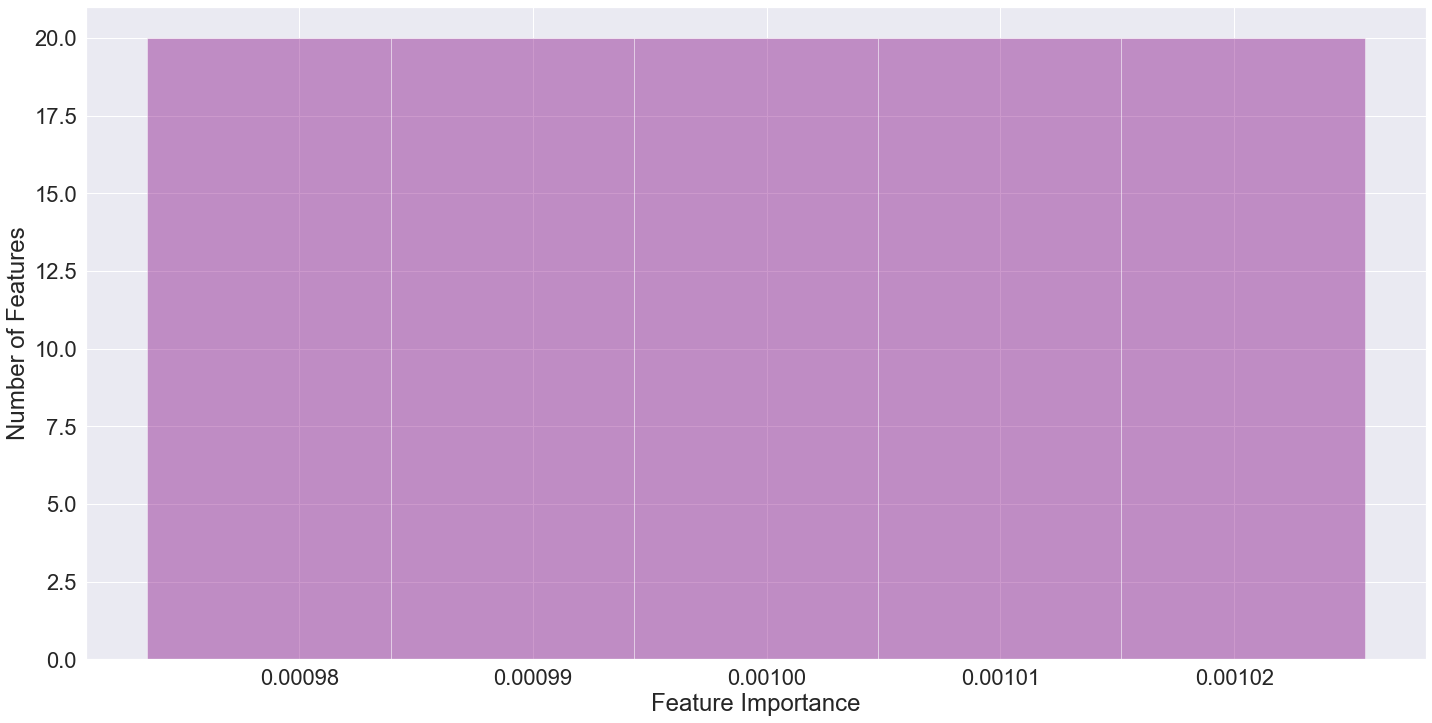

In [157]:
#plotting histogram for features after feature selection
import seaborn as sb

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(feature_sel, kde = False, color = "purple",axlabel="Feature Importance")
axes.set_ylabel("Number of Features")

In [158]:
#retrying this with SVR to see model performance after feature selection
X_rfe_train,X_rfe_test,y_rfe_train,y_rfe_test=train_test_split(X[feature_sel.index],y,test_size=0.3,random_state=0)
svrfemodel= SVR(C=1.0, epsilon=0.2)
svrfemodel.fit(X_rfe_train,y_rfe_train)

svrfe_predict=svrfemodel.predict(X_rfe_test)
#determining the accuracy
svrferrors=abs(svrfe_predict-y_rfe_test)
svrfemape=100*(svrferrors/y_rfe_test)
print("The accuracy score for svr rfe model is:",100-np.mean(svrfemape))

The accuracy score for svr rfe model is: 96.46976845672535


## Feature selection (Using Random Forest)
Too many features in a fingerprint. We need to reduce the features so that we can improve the accuracy of all the models

In [159]:
import pandas as pd
rf=RandomForestRegressor()
feature_importance= pd.DataFrame(rfmodel.feature_importances_,\
                                   index = X.columns,\
                                   columns=['importance']).sort_values('importance', ascending=False)

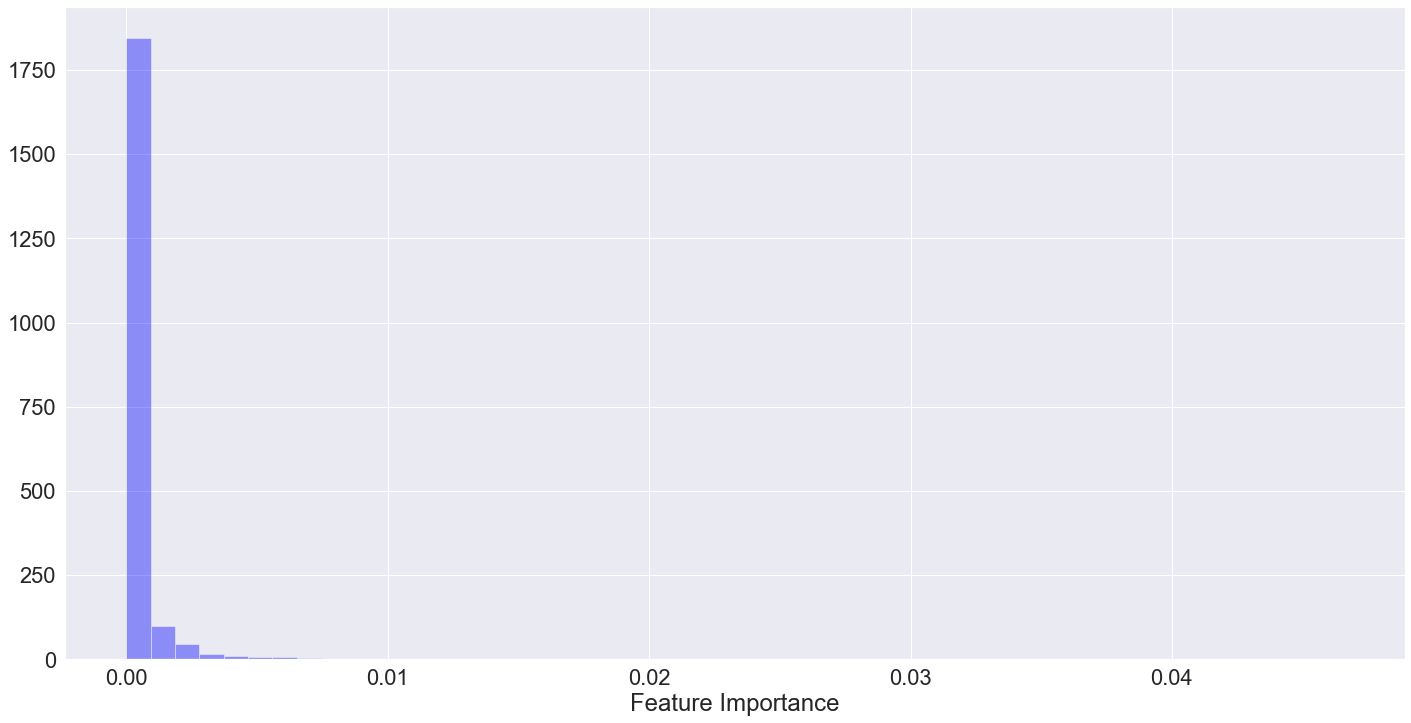

In [160]:
#identifying the relative importance of features within a fingerprint
import seaborn as sb
#histogram without feature selection
sb.set(font_scale=2)
f, axes = plt.subplots(1, 1, figsize=(24, 12))
a= sb.distplot(feature_importance, kde = False, color = "blue", axlabel="Feature Importance")

In [161]:
#select these indexes and get those respective features from X
topo_features=feature_importance[0:100]
topo_features

,importance
437,0.046574
1392,0.034125
775,0.031605
506,0.031394
1641,0.026376
...,...
415,0.001975
748,0.001933
560,0.001911
542,0.001910


In [162]:
#seeing the top 100 features with higher importance
print(X[topo_features.index])

    437  1392 775  506  1641 1153 1250 1393 217  1466  ... 664  798  265   \
0      1    1    0    0    1    1    1    1    1    1  ...    1    0    1   
1      1    1    1    1    1    1    1    1    1    1  ...    0    1    1   
2      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3      0    1    0    0    0    1    0    0    1    1  ...    0    0    0   
4      1    1    0    1    1    1    1    1    1    1  ...    0    1    1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
161    1    0    0    1    0    0    1    0    1    0  ...    1    1    0   
162    1    0    0    0    1    0    0    0    1    0  ...    1    0    1   
163    0    0    0    1    0    0    1    0    0    1  ...    0    0    1   
164    0    0    0    0    1    0    0    0    0    1  ...    1    1    1   
165    0    1    0    1    1    1    0    1    0    1  ...    1    1    0   

    1531 241  415  748  560  542  1349  
0      0    1    0    1    1    0 

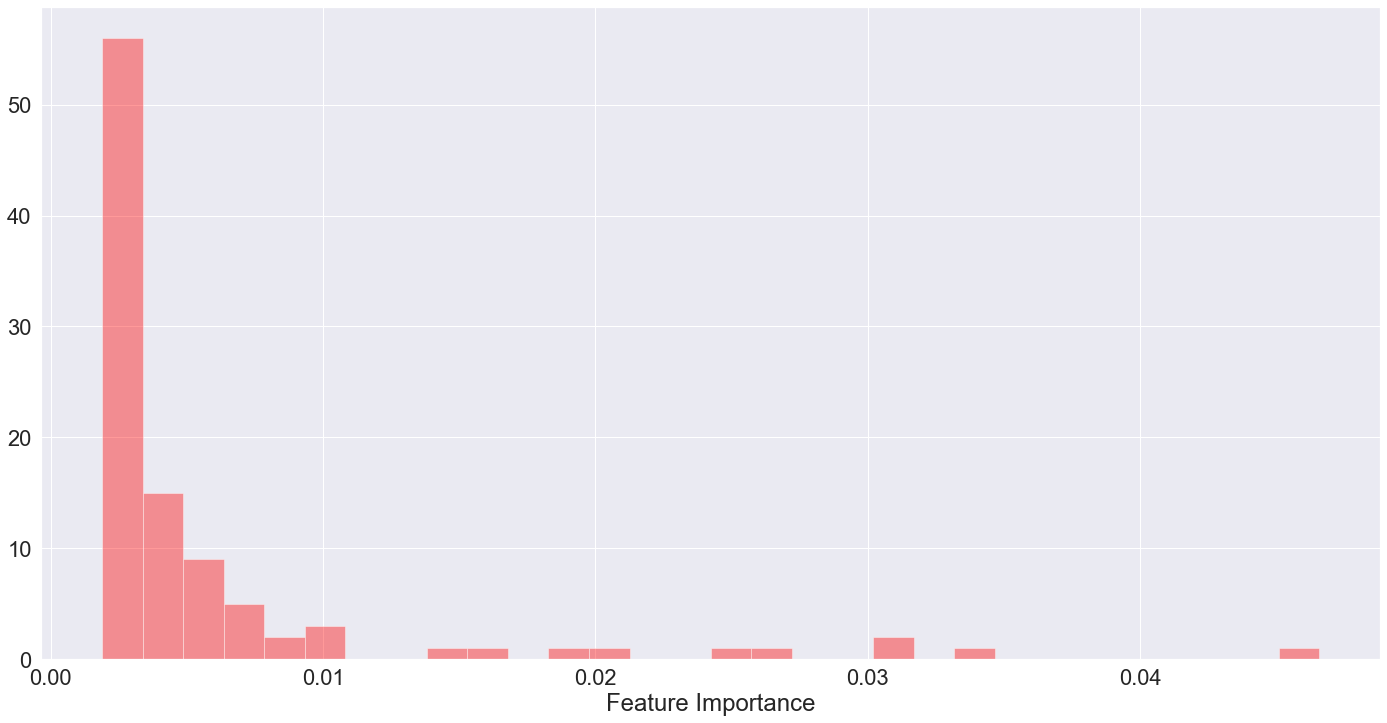

In [163]:
#plotting histogram for features after feature selection
import seaborn as sb

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(topo_features, kde = False, color = "red",axlabel="Feature Importance")

### Random forest model (after feature selection)

In [164]:
X_feat_train,X_feat_test,y_feat_train,y_feat_test=train_test_split(X[topo_features.index],y,test_size=0.3,random_state=0)
newrfmodel= RandomForestRegressor(n_estimators=100)
newrfmodel.fit(X_feat_train,y_feat_train)
newrf_predict=newrfmodel.predict(X_feat_test)

#determining the accuracy
newrferrors=abs(newrf_predict-y_feat_test)
newrfmape=100*(newrferrors/y_feat_test)
print("The accuracy score for random forest model is",100-np.mean(newrfmape))

The accuracy score for random forest model is 70.4619648567296


## After feature selection
Testing if the model performs better after feature selection

__Summary of data__ (After feature selection)
<br>
The accuracy scores for the various models are as follows:<br>
Linear regression: -95.60106609129517 <br>
Random forest: 70.4619648567296 <br>
SVR: 96.46976845672535 <br>

---

# Training models (Morgan/ECFP/Circular Fingerprint)


In [165]:
morganfp=data['circular']
morganfp_x= morganfp.apply(lambda x: np.fromstring(x,dtype=int, sep=' '))
Xm=morganfp_x
y=data['ic50']
len(Xm[0])

1024

In [166]:
Xm=pd.DataFrame(columns=[np.arange(1,1025)])
#
for i in range(0,len(topo_x)):
    Xm = Xm.append( pd.Series(morganfp_x[i], index=Xm.columns ),ignore_index=True)
Xm

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
162,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Linear regression model (before feature selection)
Using Morgan fingerprints

In [167]:
from sklearn.metrics import accuracy_score
#creating test and training set
Xm_train,Xm_test,ym_train,ym_test=train_test_split(Xm,y,test_size=0.3,random_state=0)
model= LinearRegression()
model.fit(Xm_train,ym_train)
ym_pred=model.predict(Xm_test)

#determining the model score
print("The model score is:", model.score(Xm_test,ym_test))

#determining the accuracy score
linreg_error=abs(ym_pred-ym_test)
linreg_mape=100*(linreg_error/ym_test)
print("The accuracy score for linear regression model is:",100-np.mean(linreg_mape))

The model score is: -9.581371666465032e+25
The accuracy score for linear regression model is: -610331875105108.0


### Random Forest model (before feature selection)
Using Morgan fingerprints

In [168]:
rfmodel= RandomForestRegressor(n_estimators=100)
rfmodel.fit(Xm_train,ym_train)

#score gives you correlation
rf_predict=rfmodel.predict(Xm_test)
print("The correlation score for training set is:",rfmodel.score(Xm_train,ym_train))
print("The correlation score for training set is:",rfmodel.score(Xm_test,ym_test))

#determining the accuracy
errors=abs(rf_predict-ym_test)
mape=100*(errors/ym_test)
print("The accuracy score for rf model is:",100-np.mean(mape))

The correlation score for training set is: 0.8912004025373191
The correlation score for training set is: 0.07604908059724214
The accuracy score for rf model is: 78.70264728991752


### Support Vector Regression model (before feature selection)
Using Morgan fingerprints

In [169]:
svrmodel= SVR(C=1.0, epsilon=0.2)
svrmodel.fit(Xm_train,ym_train)

svr_predict=svrmodel.predict(Xm_test)

#According to the documentation, the score returns the coefficient of determination R^2 of the prediction
print("The R^2 value for training set is:",svrmodel.score(Xm_train,ym_train))
print("The R^2 value for test set is",svrmodel.score(Xm_test,ym_test))

#determining the accuracy
svrerrors=abs(svr_predict-ym_test)
svrmape=100*(svrerrors/ym_test)
print("The accuracy score for svr model is:",100-np.mean(svrmape))

The R^2 value for training set is: 0.4080444244302437
The R^2 value for test set is 0.014146692720361951
The accuracy score for svr model is: 90.20519230332191


__Summary of data__
<br>
The accuracy scores for the various models are as follows:<br>
Linear regression: -2943775232157180.0 <br>
Random forest: 76.4670978774818 <br>
SVR: 90.20519230332191 <br>

## Feature selection (Using Lasso Regression)

In [170]:
#lasso regression for linear regression, morgan fingerprints
lasso = Lasso(alpha=.3)
lasso.fit(Xm, y)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [171]:
lasso.coef_.sum()

-0.22350712717660903

In [172]:
lasso_recoef= lasso.coef_/lasso.coef_.sum()

In [173]:
feature_importance= pd.DataFrame(lasso_recoef,\
                                 index = Xm.columns,\
                                 columns=['importance']).sort_values('importance', ascending=False)
feature_importance.round(6)

,importance
315,0.514847
131,0.485153
689,-0.000000
676,-0.000000
677,-0.000000
...,...
348,0.000000
349,-0.000000
350,0.000000
351,0.000000


Text(0, 0.5, 'Number of Features')

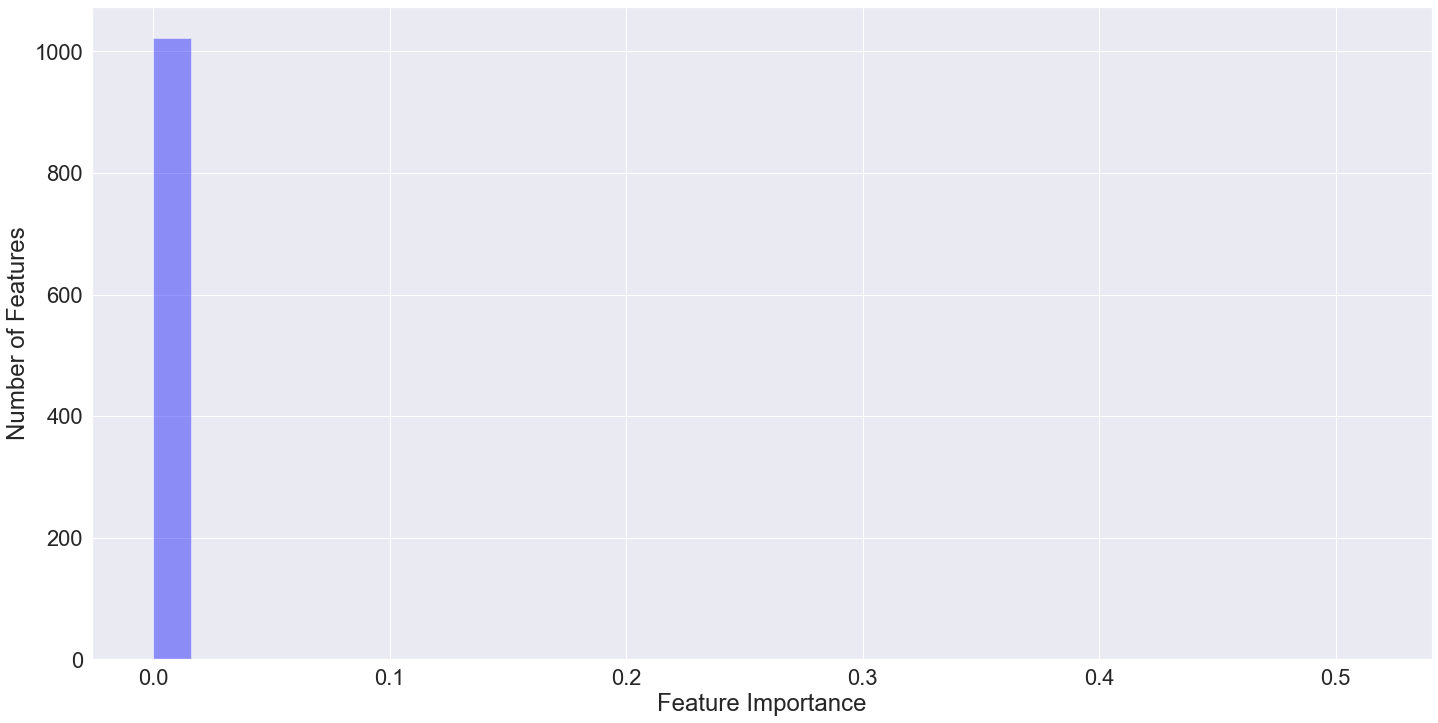

In [174]:
#identifying the relative importance of features within a fingerprint
import seaborn as sb
#histogram without feature selection
sb.set(font_scale=2)
f, axes = plt.subplots(1, 1, figsize=(24, 12))
a= sb.distplot(feature_importance, kde = False, color = "blue", axlabel="Feature Importance")
a.set_ylabel("Number of Features")

In [175]:
#select these indexes and get those respective features from X
feature_lasso=feature_importance[0:100]
feature_lasso

,importance
315,0.514847
131,0.485153
689,-0.000000
676,-0.000000
677,-0.000000
...,...
739,0.000000
737,0.000000
707,0.000000
721,0.000000


In [176]:
print(Xm[feature_lasso.index])

    315 131 689 676 677 678 679 680 681 682  ... 763 764 765 766 767 739 737  \
0     1   1   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   0   0   
1     0   1   0   0   0   0   0   1   0   0  ...   0   0   0   0   0   1   0   
2     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3     1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4     1   1   0   0   0   0   0   1   0   0  ...   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
161   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
162   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
163   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
164   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
165   0   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

    707 721 708  
0     1   0   0  
1  

Text(0, 0.5, 'Number of Features')

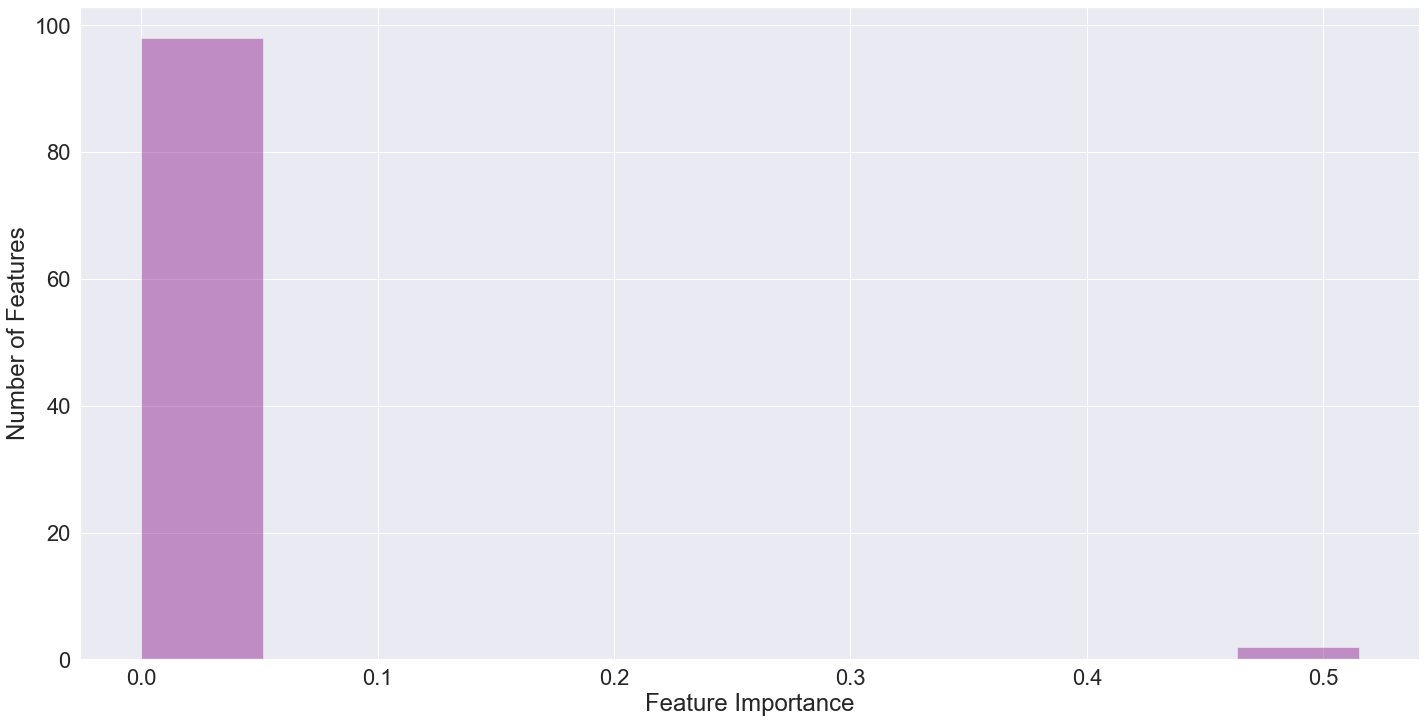

In [177]:
#plotting histogram for features after feature selection
import seaborn as sb

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(feature_lasso, kde = False, color = "purple",axlabel="Feature Importance")
axes.set_ylabel("Number of Features")

In [178]:
#creating test and training set after feature selection
Xm_lasso_train,Xm_lasso_test,ym_lasso_train,ym_lasso_test=train_test_split(Xm[feature_lasso.index],y,test_size=0.3,random_state=0)
lassomodel= LinearRegression()
lassomodel.fit(Xm_lasso_train,ym_lasso_train)
ym_lassopred=lassomodel.predict(Xm_lasso_test)

#new model score after feature selection
print("The model score for linear regression model is",lassomodel.score(Xm_lasso_test,ym_lasso_test))

#determining the accuracy score
lassolinreg_error=abs(ym_lassopred-ym_lasso_test)
lassolinreg_mape=100*(lassolinreg_error/ym_lasso_test)
print("The accuracy score for linear lasso regression model is:",100-np.mean(lassolinreg_mape))

The model score for linear regression model is -3.3710142924086497e+25
The accuracy score for linear lasso regression model is: -678154284490331.2


## Feature selection (Using SVM RFE)

In [179]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
svrmodel= SVR(kernel="linear") #read online that rfe only works when kernel is linear, not sure what is the effect
rfe= RFE(svrmodel,n_features_to_select=100, step=1)
rfe= rfe.fit(Xm,y)

In [180]:
rfe.ranking_

array([581, 166, 609, ..., 426, 512, 179])

In [181]:
rfe.ranking_.sum()

428374

Because the sum of feature importance is not 1, a new variable was created so that the feature importance would be relative, and the sum is 1

In [182]:
rfe_rerank=rfe.ranking_/rfe.ranking_.sum()

In [183]:
feature_importance= pd.DataFrame(rfe_rerank,\
                                   index = Xm.columns,\
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importance.round(6)

,importance
396,0.002159
56,0.002157
908,0.002155
825,0.002152
938,0.002150
...,...
832,0.000002
933,0.000002
280,0.000002
931,0.000002


Text(0, 0.5, 'Number of Features')

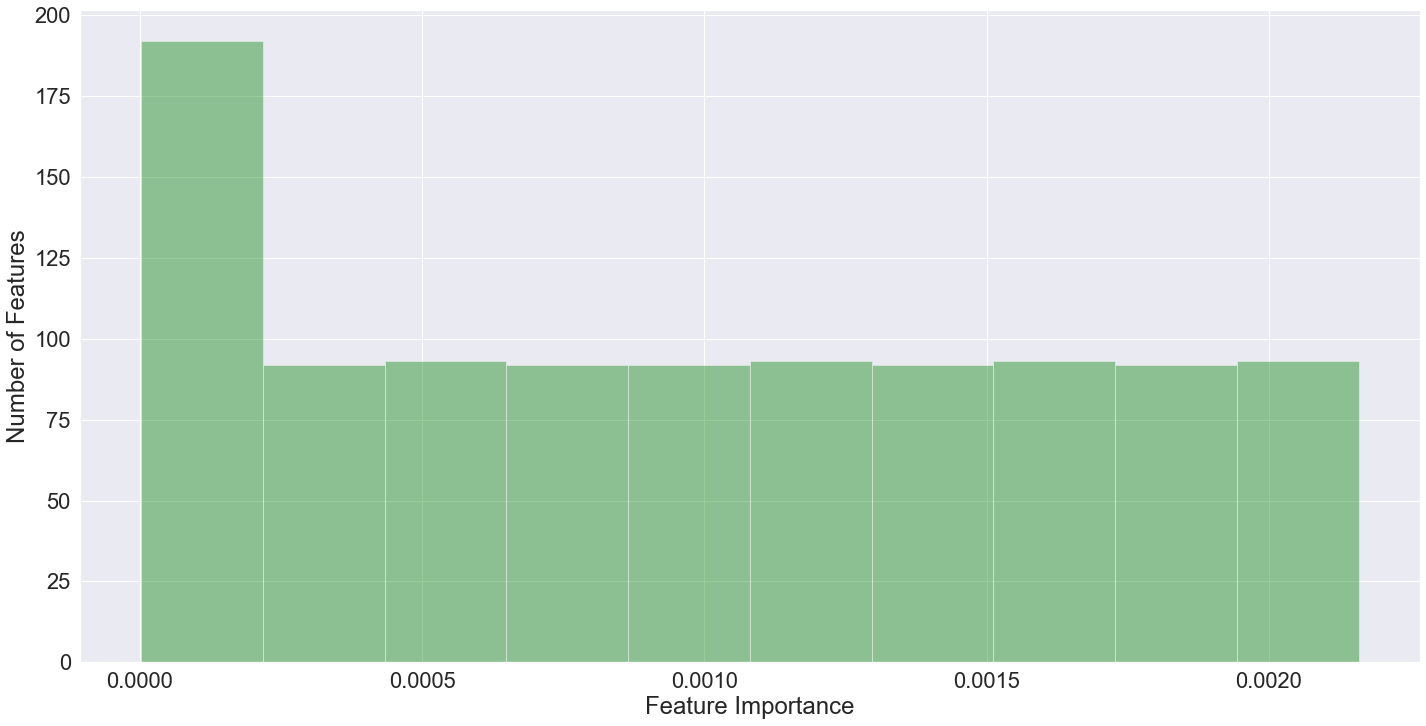

In [184]:
#identifying the relative importance of features within a fingerprint
import seaborn as sb
#histogram without feature selection
sb.set(font_scale=2)
f, axes = plt.subplots(1, 1, figsize=(24, 12))
a= sb.distplot(feature_importance, kde = False, color = "green", axlabel="Feature Importance")
a.set_ylabel("Number of Features")

In [185]:
#select these indexes and get those respective features from X
feature_sel=feature_importance[0:100]
feature_sel

,importance
396,0.002159
56,0.002157
908,0.002155
825,0.002152
938,0.002150
...,...
926,0.001938
553,0.001935
537,0.001933
190,0.001931


In [186]:
print(Xm[feature_sel.index])

    396 56  908 825 938 352 221 770 451 867  ... 738 353 518 768 812 926 553  \
0     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
161   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   
162   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
163   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
164   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
165   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

    537 190 114  
0     0   0   0  
1  

Text(0, 0.5, 'Number of Features')

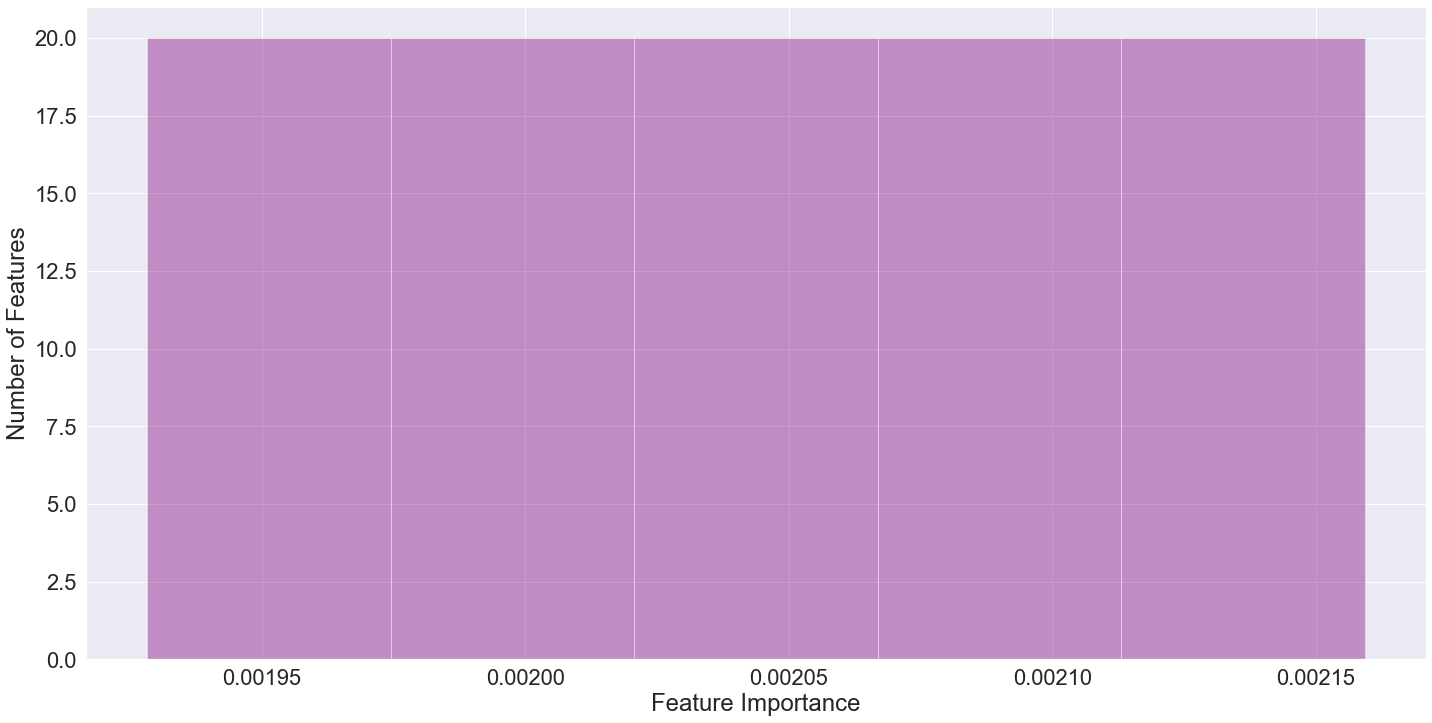

In [187]:
#plotting histogram for features after feature selection
import seaborn as sb

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(feature_sel, kde = False, color = "purple",axlabel="Feature Importance")
axes.set_ylabel("Number of Features")

In [188]:
#retrying this with SVR to see model performance after feature selection
Xm_rfe_train,Xm_rfe_test,ym_rfe_train,ym_rfe_test=train_test_split(Xm[feature_sel.index],y,test_size=0.3,random_state=0)
svrfemodel= SVR(C=1.0, epsilon=0.2)
svrfemodel.fit(Xm_rfe_train,ym_rfe_train)

svrfe_predict=svrfemodel.predict(Xm_rfe_test)
#determining the accuracy
svrferrors=abs(svrfe_predict-ym_rfe_test)
svrfemape=100*(svrferrors/ym_rfe_test)
print("The accuracy score for svr rfe model is:",100-np.mean(svrfemape))

The accuracy score for svr rfe model is: 91.14161876418865


## Feature selection (Using Random Forest)
Too many features in a fingerprint. We need to reduce the features so that we can improve the accuracy of all the models

In [189]:
import pandas as pd
#with feature selection 
rf=RandomForestRegressor()
feature_importance= pd.DataFrame(rfmodel.feature_importances_,\
                                   index = Xm.columns,\
                                   columns=['importance']).sort_values('importance', ascending=False)

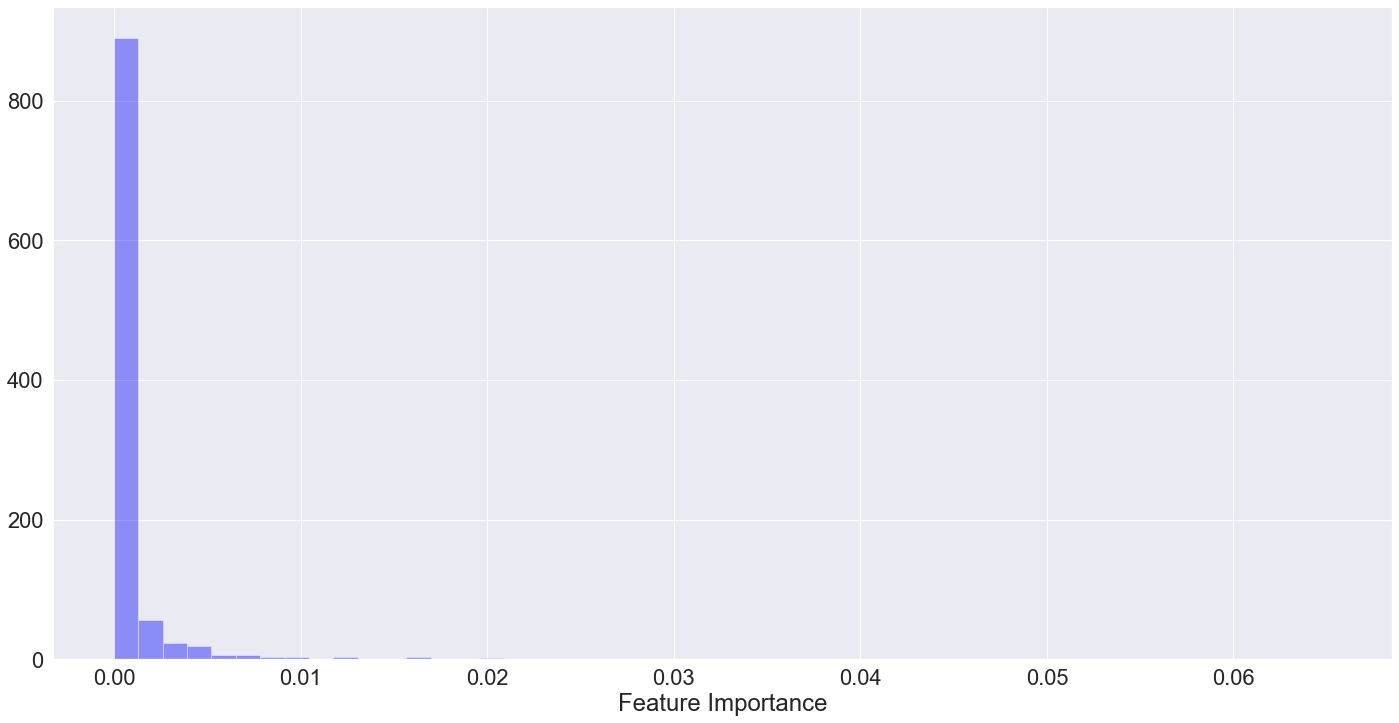

In [190]:
#identifying the relative importance of features within a fingerprint
import seaborn as sb
#histogram without feature selection
sb.set(font_scale=2)
f, axes = plt.subplots(1, 1, figsize=(24, 12))
a= sb.distplot(feature_importance, kde = False, color = "blue", axlabel="Feature Importance")

In [191]:
morgan_features=feature_importance[0:100]
morgan_features

,importance
63,0.065255
792,0.055124
362,0.049652
131,0.038941
175,0.026741
...,...
484,0.001972
932,0.001971
611,0.001956
91,0.001911


In [192]:
#seeing the top 100 features with higher importance
print(Xm[morgan_features.index])

    63  792 362 131 175 12  127 298 831 980  ... 254 137 962 268 542 484 932  \
0     0   0   1   1   0   0   0   0   0   0  ...   0   0   0   0   1   0   0   
1     0   1   1   1   1   1   0   0   1   0  ...   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3     1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4     0   0   1   1   0   1   0   1   0   0  ...   0   0   1   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
161   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   
162   0   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
163   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   1   0   0   0   
164   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
165   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   

    611 91  213  
0     0   0   1  
1  

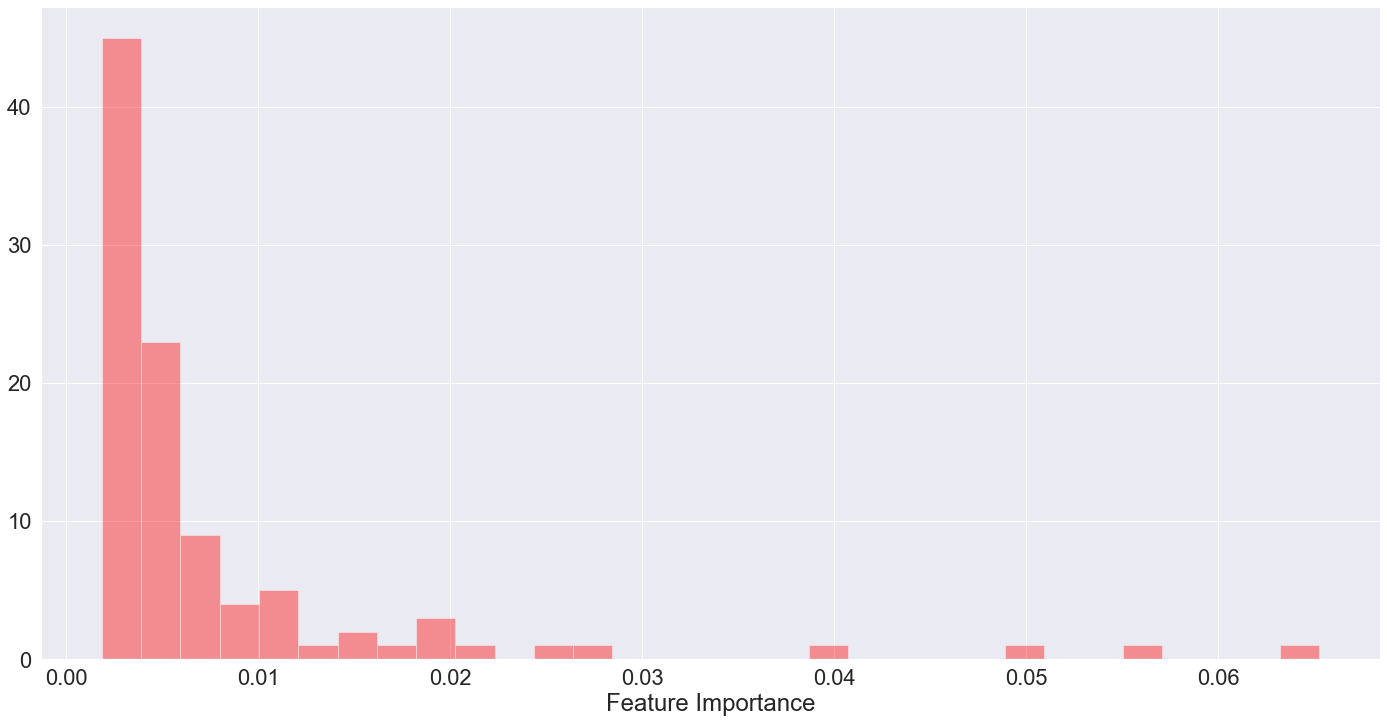

In [193]:
#plotting histogram for features after feature selection
import seaborn as sb

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(morgan_features, kde = False, color = "red",axlabel="Feature Importance")

### Random forest model (after feature selection)

In [194]:
Xm_feat_train,Xm_feat_test,ym_feat_train,ym_feat_test=train_test_split(Xm[morgan_features.index],y,test_size=0.3,random_state=0)
newrfmodel= RandomForestRegressor(n_estimators=100)
newrfmodel.fit(Xm_feat_train,ym_feat_train)
newrf_predict=newrfmodel.predict(Xm_feat_test)

#determining the accuracy
newrferrors=abs(newrf_predict-ym_feat_test)
newrfmape=100*(newrferrors/ym_feat_test)
print("The accuracy score for random forest model is",100-np.mean(newrfmape))

The accuracy score for random forest model is 70.59744525608012


## After feature selection
Testing if the model performs better after feature selection

__Summary of data__ (After feature selection)
<br>
The accuracy scores for the various models are as follows:<br>
Linear regression: -678154284490331.2 <br>
Random forest: 70.59744525608012 <br>
SVR: 91.14161876418865 <br>

---

# Training models (Maccs Fingerprint)


In [195]:
maccsfp=data['maccs']
maccsfp_x= maccsfp.apply(lambda x: np.fromstring(x,dtype=int, sep=' '))
Xmac=maccsfp_x
y=data['ic50']
len(Xmac[0])

167

In [196]:
Xmac=pd.DataFrame(columns=[np.arange(1,168)])
#
for i in range(0,len(topo_x)):
    Xmac = Xmac.append( pd.Series(maccsfp_x[i], index=Xmac.columns ),ignore_index=True)
Xmac

,1,2,3,4,5,6,7,8,9,10,...,158,159,160,161,162,163,164,165,166,167
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
162,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
163,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
164,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


### Linear regression model (before feature selection)
Using Maccs fingerprints

In [197]:
#creating test and training set
X_mac_train,X_mac_test,y_mac_train,y_mac_test=train_test_split(Xmac,y,test_size=0.3,random_state=0)
model= LinearRegression()
model.fit(X_mac_train,y_mac_train)
y_mac_pred=model.predict(X_mac_test)

#determining the model score
print("The model score is:", model.score(X_mac_test,y_mac_test))

#determining the accuracy score
linreg_error=abs(y_mac_pred-y_mac_test)
linreg_mape=100*(linreg_error/y_mac_test)
print("The accuracy score for linear regression model is:",100-np.mean(linreg_mape))

The model score is: -5.608488837349783e+22
The accuracy score for linear regression model is: -16096181421901.186


### Random Forest model (before feature selection)
Using Maccs fingerprints

In [198]:
rfmodel= RandomForestRegressor(n_estimators=100)
rfmodel.fit(X_mac_train,y_mac_train)

#score gives you correlation
rf_predict=rfmodel.predict(X_mac_test)
print("The correlation score for training set is:",rfmodel.score(X_mac_train,y_mac_train))
print("The correlation score for training set is:",rfmodel.score(X_mac_test,y_mac_test))
#determining the accuracy
errors=abs(rf_predict-y_mac_test)
mape=100*(errors/y_mac_test)
print("The accuracy score for rf model is:",100-np.mean(mape))

The correlation score for training set is: 0.863796093167731
The correlation score for training set is: 0.30747539209531216
The accuracy score for rf model is: 57.011417823623304


### Support Vector Regression model (before feature selection)
Using Morgan fingerprints

In [199]:
svrmodel= SVR(C=1.0, epsilon=0.2)
svrmodel.fit(X_mac_train,y_mac_train)

svr_predict=svrmodel.predict(X_mac_test)

#According to the documentation, the score returns the coefficient of determination R^2 of the prediction
print("The R^2 value for training set is:",svrmodel.score(X_mac_train,y_mac_train))
print("The R^2 value for test set is",svrmodel.score(X_mac_test,y_mac_test))

#determining the accuracy
svrerrors=abs(svr_predict-y_mac_test)
svrmape=100*(svrerrors/y_mac_test)
print("The accuracy score for svr model is:",100-np.mean(svrmape))

The R^2 value for training set is: 0.30261458697956756
The R^2 value for test set is 0.13391732873182705
The accuracy score for svr model is: 75.740677699616


__Summary of data__
<br>
The accuracy scores for the various models are as follows:<br>
Linear regression: -15350409125293.8 <br>
Random forest: 60.1961016362716 <br>
SVR: 75.740677699616 <br>

## Feature Selection

## Feature selection (Using Lasso Regression)

In [200]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

lasso = Lasso(alpha=.3)
lasso.fit(Xmac, y)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [201]:
lasso.coef_.sum()

-0.7483152262226007

In [202]:
lasso_recoef= lasso.coef_/lasso.coef_.sum()

In [203]:
feature_importance= pd.DataFrame(lasso_recoef,\
                                 index = Xmac.columns,\
                                 columns=['importance']).sort_values('importance', ascending=False)
feature_importance.round(6)

,importance
141,0.996418
55,0.003582
1,-0.000000
108,-0.000000
109,0.000000
...,...
58,0.000000
59,-0.000000
60,-0.000000
61,-0.000000


Text(0, 0.5, 'Number of Features')

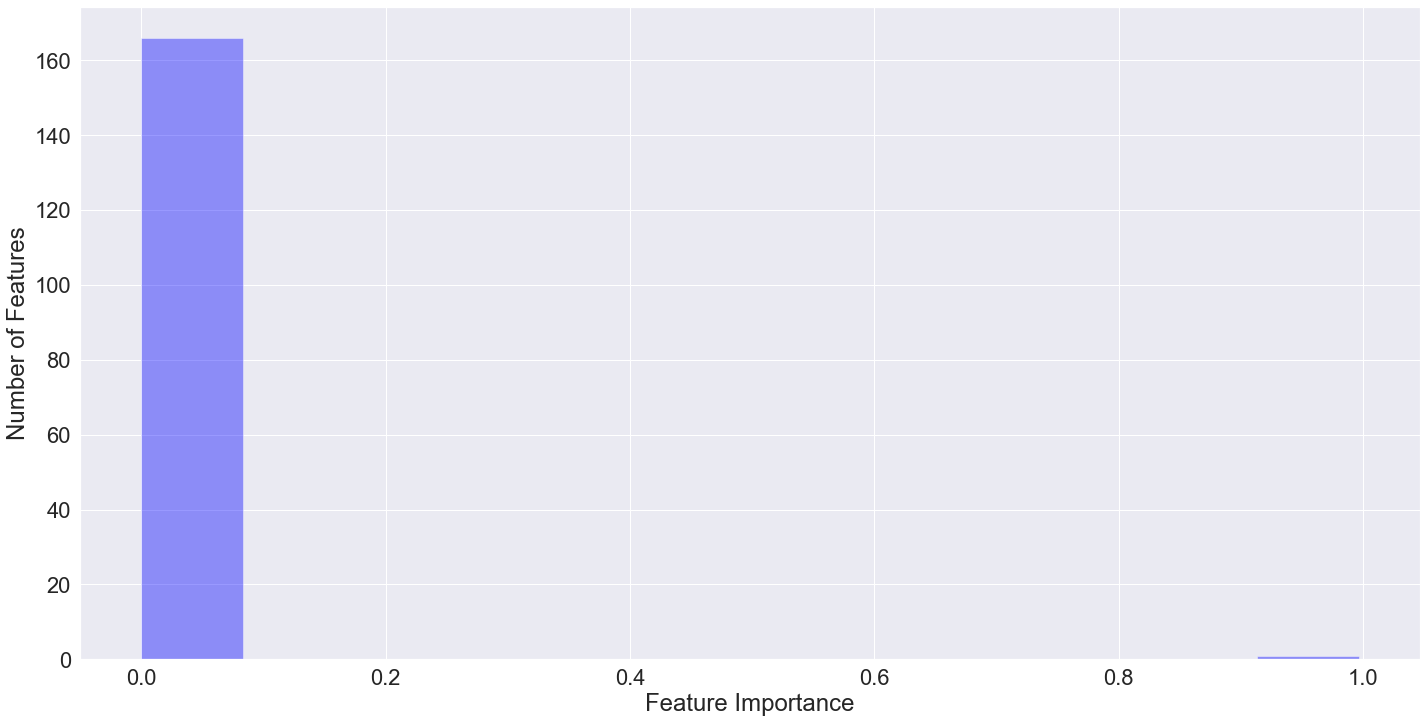

In [204]:
#identifying the relative importance of features within a fingerprint
import seaborn as sb
#histogram without feature selection
sb.set(font_scale=2)
f, axes = plt.subplots(1, 1, figsize=(24, 12))
a= sb.distplot(feature_importance, kde = False, color = "blue", axlabel="Feature Importance")
a.set_ylabel("Number of Features")

In [205]:
#select these indexes and get those respective features from X
feature_lasso=feature_importance[0:100]
feature_lasso

,importance
141,0.996418
55,0.003582
1,-0.000000
108,-0.000000
109,0.000000
...,...
32,-0.000000
33,-0.000000
34,-0.000000
35,-0.000000


In [206]:
print(Xmac[feature_lasso.index])

    141 55  1   108 109 110 111 112 113 114  ... 27  28  29  30  31  32  33   \
0     1   0   0   0   0   1   1   0   1   1  ...   0   0   0   0   0   0   0   
1     1   0   0   0   1   0   0   1   1   1  ...   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3     1   1   0   0   0   1   1   0   0   1  ...   0   0   0   0   0   0   0   
4     1   1   0   0   1   1   1   0   1   0  ...   1   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
161   0   0   0   0   1   0   1   1   0   1  ...   0   0   0   0   0   0   0   
162   0   1   0   0   0   0   1   1   0   0  ...   0   0   0   0   0   0   0   
163   0   0   0   0   0   0   1   0   1   0  ...   0   0   0   0   0   0   0   
164   1   0   0   0   0   1   1   1   0   1  ...   0   0   0   0   0   0   0   
165   0   0   0   1   1   0   0   1   1   0  ...   0   0   0   0   0   0   0   

    34  35  36   
0     0   0   0  
1  

Text(0, 0.5, 'Number of Features')

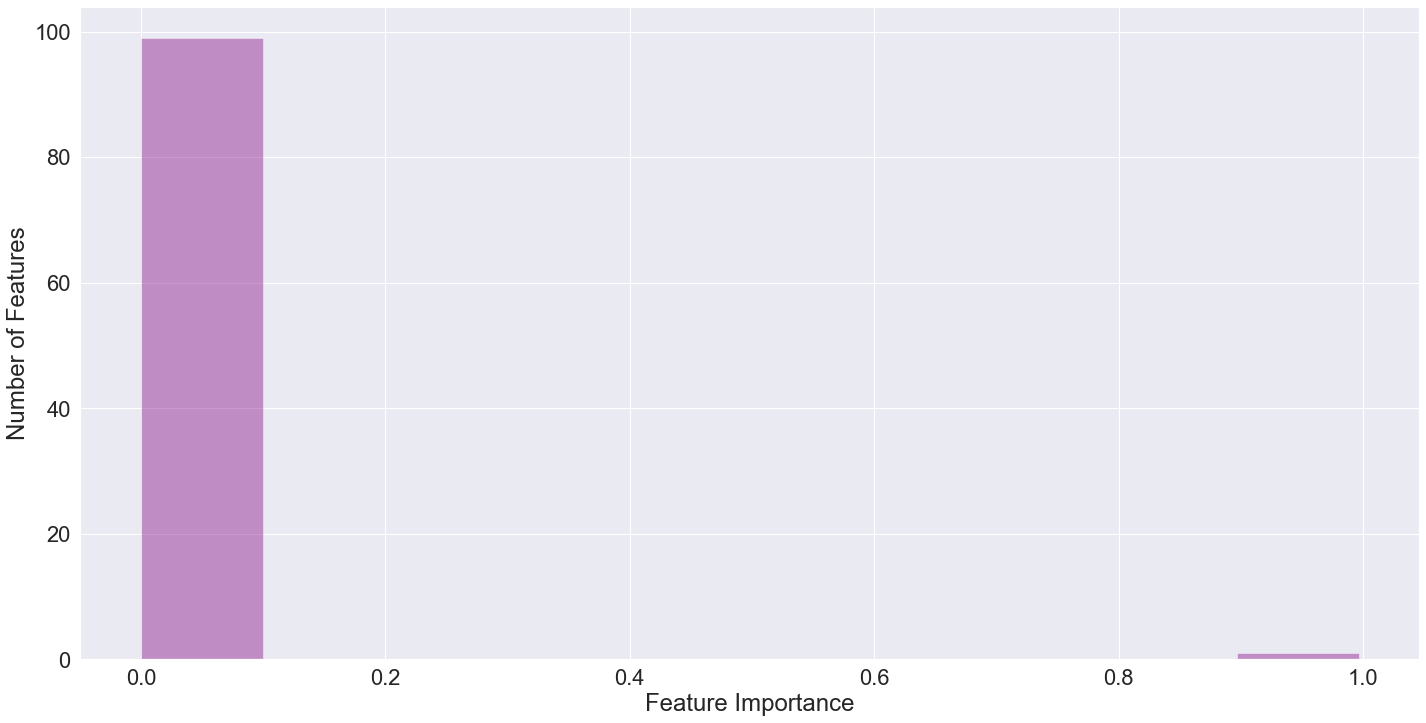

In [207]:
#plotting histogram for features after feature selection
import seaborn as sb

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(feature_lasso, kde = False, color = "purple",axlabel="Feature Importance")
axes.set_ylabel("Number of Features")

In [208]:
#creating test and training set after feature selection
Xmac_lasso_train,Xmac_lasso_test,ymac_lasso_train,ymac_lasso_test=train_test_split(Xmac[feature_lasso.index],y,test_size=0.3,random_state=0)
lassomodel= LinearRegression()
lassomodel.fit(Xmac_lasso_train,ymac_lasso_train)
ymac_lassopred=lassomodel.predict(Xmac_lasso_test)

#new model score after feature selection
print("The model score for linear regression model is",lassomodel.score(Xmac_lasso_test,ymac_lasso_test))

#determining the accuracy score
lassolinreg_error=abs(ymac_lassopred-ymac_lasso_test)
lassolinreg_mape=100*(lassolinreg_error/ymac_lasso_test)
print("The accuracy score for linear lasso regression model is:",100-np.mean(lassolinreg_mape))

The model score for linear regression model is -4.739998454205092
The accuracy score for linear lasso regression model is: -174.2361862455151


## Feature selection (Using SVM RFE)

In [209]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
svrmodel= SVR(kernel="linear") #read online that rfe only works when kernel is linear, not sure what is the effect
rfe= RFE(svrmodel,n_features_to_select=100, step=1)
rfe= rfe.fit(Xmac,y)

In [210]:
rfe.ranking_

array([68, 67, 66, 65, 64, 63, 62, 61,  1, 10, 59,  1, 55,  1, 54, 53,  1,
        1,  1,  1, 57,  1, 22,  1,  1, 40,  1,  1,  1,  1, 58, 56,  1, 49,
        2, 60, 36,  1,  1,  1,  1,  1, 43, 16,  1, 12,  1,  1, 32,  1,  3,
        1, 21,  1,  1,  1,  1,  1, 28,  1, 24,  1, 18,  1,  1,  1, 39,  1,
        1, 20,  1, 38, 37, 11,  1,  1,  5, 42,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 51, 52, 47, 17,  1, 48, 45,  1,  1, 41,  1,  9,  1,  4,
       26,  1, 23,  1, 19,  1, 30,  1,  1, 14,  1, 15,  1,  1,  1,  1,  1,
       33, 29,  1,  1, 46, 31,  1,  1,  1,  8, 44,  1,  1,  1,  1, 34,  1,
        1,  1,  1, 35, 13,  1,  1, 25,  6,  1,  1,  1,  1,  1,  7, 27,  1,
        1,  1,  1,  1, 50,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [211]:
rfe.ranking_.sum()

2445

Because the sum of feature importance is not 1, a new variable was created so that the feature importance would be relative, and the sum is 1

In [212]:
rfe_rerank=rfe.ranking_/rfe.ranking_.sum()

In [213]:
feature_importance= pd.DataFrame(rfe_rerank,\
                                   index = Xmac.columns,\
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importance.round(6)

,importance
1,0.027812
2,0.027403
3,0.026994
4,0.026585
5,0.026176
...,...
65,0.000409
64,0.000409
62,0.000409
60,0.000409


Text(0, 0.5, 'Number of Features')

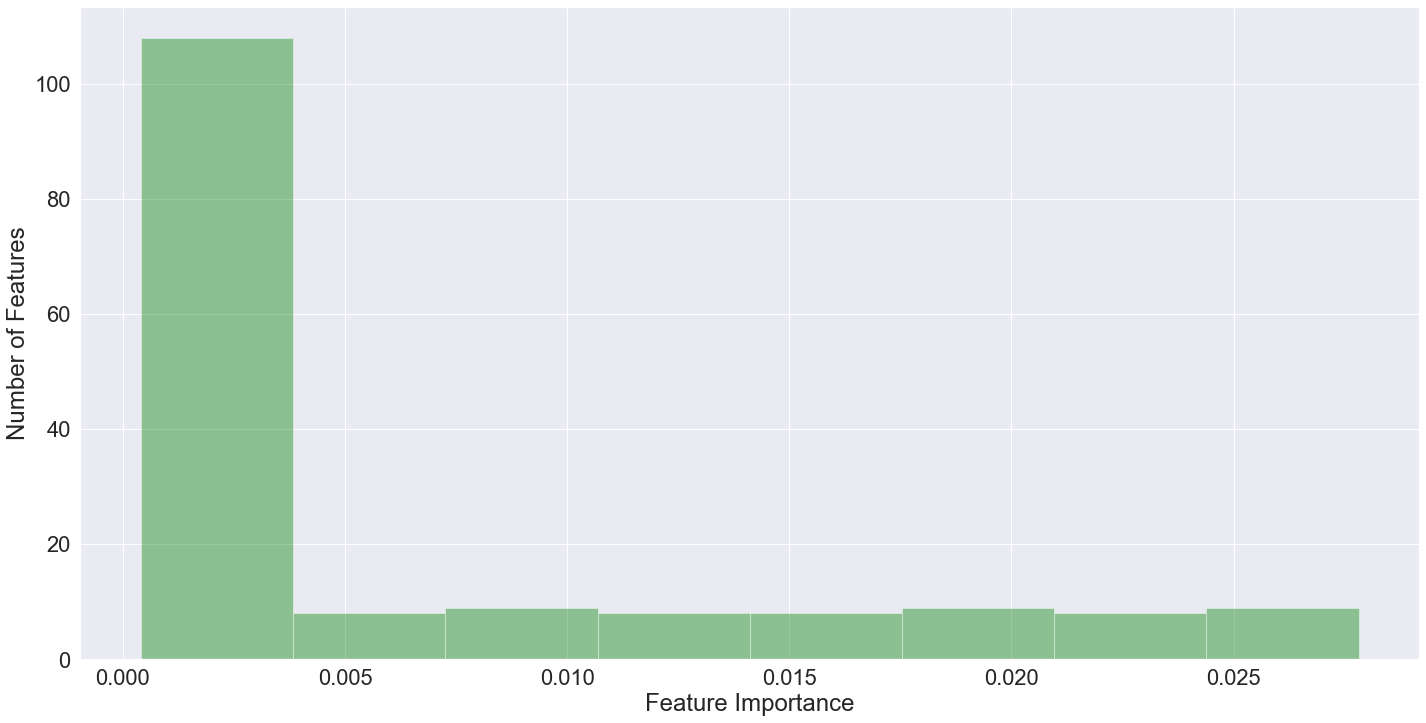

In [214]:
#identifying the relative importance of features within a fingerprint
import seaborn as sb
#histogram without feature selection
sb.set(font_scale=2)
f, axes = plt.subplots(1, 1, figsize=(24, 12))
a= sb.distplot(feature_importance, kde = False, color = "green", axlabel="Feature Importance")
a.set_ylabel("Number of Features")

In [215]:
#select these indexes and get those respective features from X
feature_sel=feature_importance[0:100]
feature_sel

,importance
1,0.027812
2,0.027403
3,0.026994
4,0.026585
5,0.026176
...,...
137,0.000409
136,0.000409
134,0.000409
133,0.000409


In [216]:
print(Xmac[feature_sel.index])

    1   2   3   4   5   6   7   8   36  11   ... 146 143 142 139 138 137 136  \
0     0   0   0   0   0   0   0   0   0   0  ...   1   1   0   1   1   1   0   
1     0   0   0   0   0   0   0   0   0   0  ...   1   1   1   1   1   1   1   
2     0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   
3     0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   1   0   1   
4     0   0   0   0   0   0   0   0   0   0  ...   1   0   1   0   1   1   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
161   0   0   0   0   0   0   0   0   0   0  ...   1   1   1   1   1   0   1   
162   0   0   0   0   0   0   0   0   0   0  ...   1   1   0   1   1   0   1   
163   0   0   0   0   0   0   0   0   0   0  ...   1   1   0   0   1   1   1   
164   0   0   0   0   0   0   0   0   0   0  ...   1   1   0   1   1   1   1   
165   0   0   0   0   0   0   0   0   0   0  ...   0   1   1   0   1   0   1   

    134 133 132  
0     0   1   0  
1  

Text(0, 0.5, 'Number of Features')

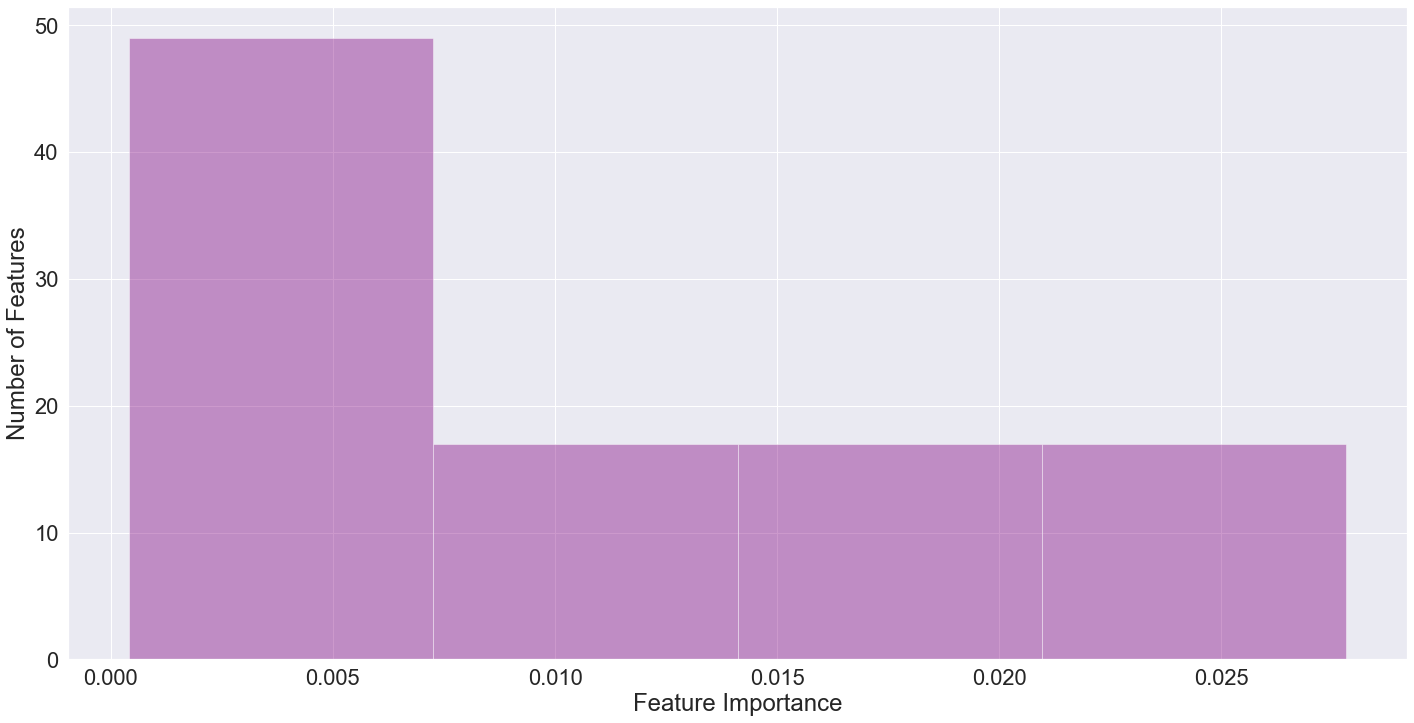

In [217]:
#plotting histogram for features after feature selection
import seaborn as sb

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(feature_sel, kde = False, color = "purple",axlabel="Feature Importance")
axes.set_ylabel("Number of Features")

In [218]:
#retrying this with SVR to see model performance after feature selection
Xmac_rfe_train,Xmac_rfe_test,ymac_rfe_train,ymac_rfe_test=train_test_split(Xmac[feature_sel.index],y,test_size=0.3,random_state=0)
svrfemodel= SVR(C=1.0, epsilon=0.2)
svrfemodel.fit(Xmac_rfe_train,ymac_rfe_train)

svrfe_predict=svrfemodel.predict(Xmac_rfe_test)
#determining the accuracy
svrferrors=abs(svrfe_predict-ymac_rfe_test)
svrfemape=100*(svrferrors/ymac_rfe_test)
print("The accuracy score for svr rfe model is:",100-np.mean(svrfemape))

The accuracy score for svr rfe model is: 76.65740977697769


## Feature selection (Using Random Forest)
Too many features in a fingerprint. We need to reduce the features so that we can improve the accuracy of all the models

In [219]:
import pandas as pd
#with feature selection 
rf=RandomForestRegressor()
feature_importance= pd.DataFrame(rfmodel.feature_importances_,\
                                   index = Xmac.columns,\
                                   columns=['importance']).sort_values('importance', ascending=False)

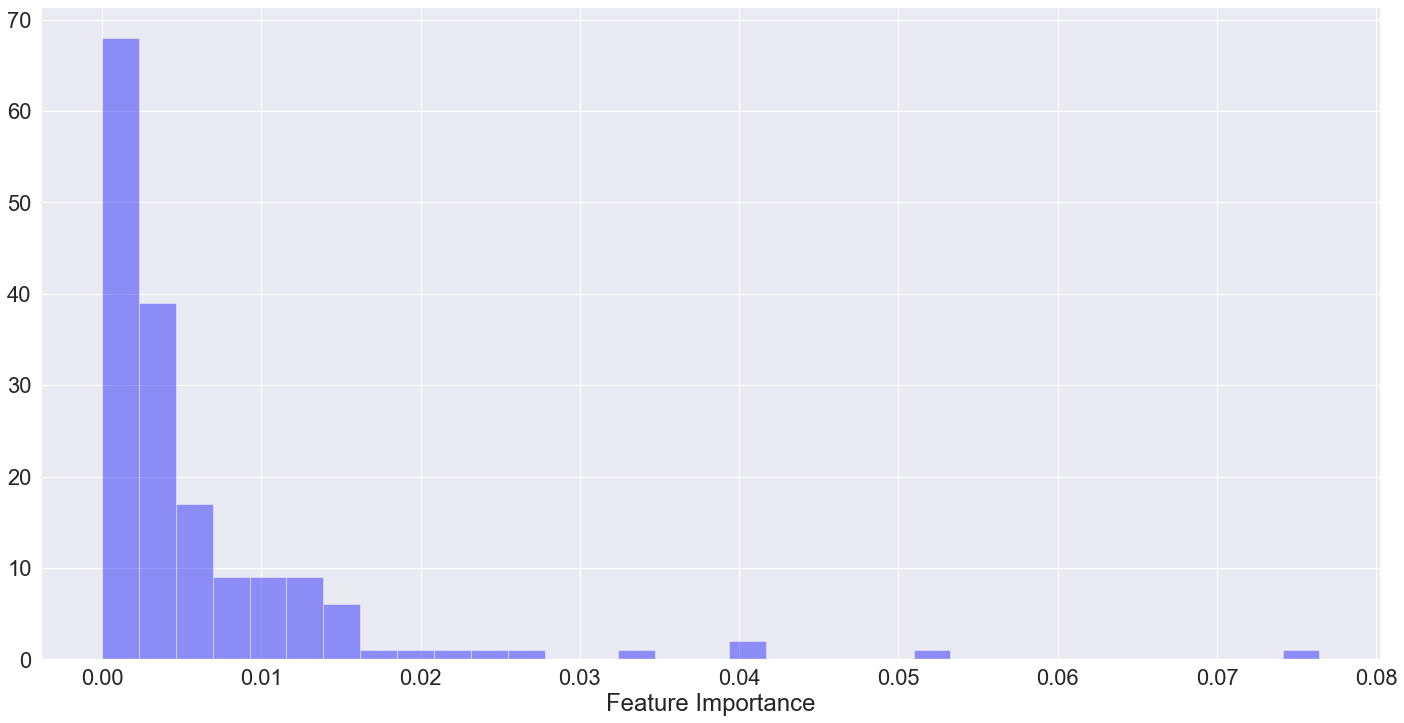

In [220]:
#identifying the relative importance of features within a fingerprint
import seaborn as sb
#histogram without feature selection
sb.set(font_scale=2)
f, axes = plt.subplots(1, 1, figsize=(24, 12))
a= sb.distplot(feature_importance, kde = False, color = "blue", axlabel="Feature Importance")

In [221]:
#select these indexes and get those respective features from X
maccs_features=feature_importance[0:100]
maccs_features

,importance
124,0.076430
42,0.051738
90,0.041526
73,0.041016
14,0.034366
...,...
89,0.002629
103,0.002537
37,0.002365
79,0.002353


In [222]:
#seeing the top 100 features with higher importance
print(Xmac[maccs_features.index])

    124 42  90  73  14  137 132 54  117 141  ... 108 138 44  152 147 89  103  \
0     1   0   1   1   0   1   0   0   0   1  ...   0   1   0   0   1   0   0   
1     1   0   1   1   0   1   1   0   1   1  ...   0   1   0   1   1   0   0   
2     0   0   0   0   0   0   1   0   0   0  ...   0   0   0   1   0   0   0   
3     0   0   1   1   0   0   1   1   0   1  ...   0   1   0   1   1   0   0   
4     1   0   1   1   0   1   1   0   1   1  ...   0   1   0   1   1   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
161   0   0   0   0   0   0   1   0   0   0  ...   0   1   0   1   0   0   0   
162   0   0   0   0   0   0   1   0   0   0  ...   0   1   0   1   0   0   0   
163   0   0   0   0   0   1   1   1   0   0  ...   0   1   0   1   1   1   1   
164   1   0   0   0   0   1   1   1   0   1  ...   0   1   0   1   1   0   0   
165   1   0   0   0   0   0   0   0   0   0  ...   1   1   0   0   0   1   0   

    37  79  129  
0     0   0   1  
1  

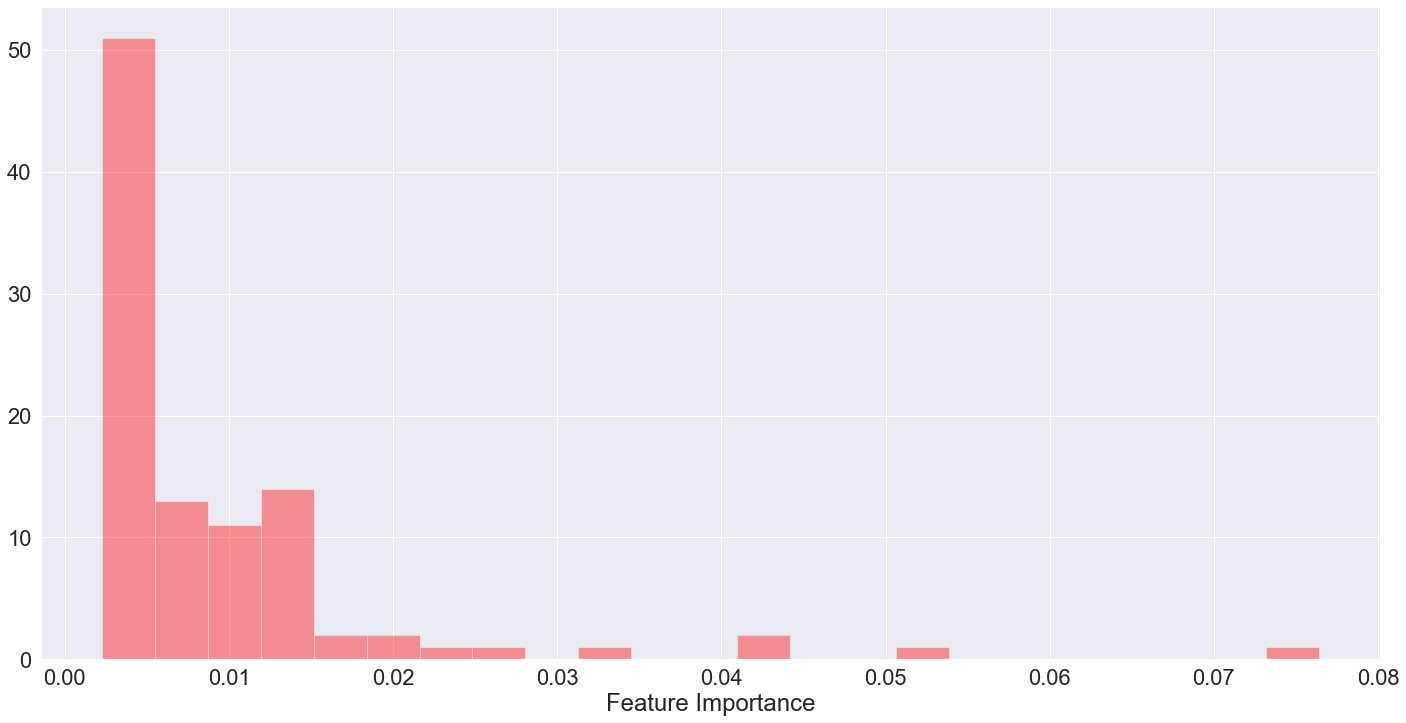

In [223]:
#plotting histogram for features after feature selection
import seaborn as sb

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(maccs_features, kde = False, color = "red",axlabel="Feature Importance")

### Random forest model (after feature selection)

In [224]:
Xmac_feat_train,Xmac_feat_test,ymac_feat_train,ymac_feat_test=train_test_split(Xmac[maccs_features.index],y,test_size=0.3,random_state=0)
newrfmodel= RandomForestRegressor(n_estimators=100)
newrfmodel.fit(Xmac_feat_train,ymac_feat_train)
newrf_predict=newrfmodel.predict(Xmac_feat_test)

#determining the accuracy
newrferrors=abs(newrf_predict-ymac_feat_test)
newrfmape=100*(newrferrors/ymac_feat_test)
print("The accuracy score for random forest model is",100-np.mean(newrfmape))

The accuracy score for random forest model is 54.895914108670524


## After feature selection
Testing if the model performs better after feature selection

__Summary of data__ (After feature selection)
<br>
The accuracy scores for the various models are as follows:<br>
Linear regression: -174.2361862455151 <br>
Random forest: 54.895914108670524 <br>
SVR: 76.65740977697769 <br>